# Finally we construct our dataframe, and we can now explore the data and try our first model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline

### IBM have a different way to load csv files to dataframes, so this is why the code is "weird"

In [3]:
products = pd.read_csv('products.csv')

df = pd.read_csv('DF.csv')

In [2]:
from io import StringIO
import requests
import json
import pandas as pd

# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_5bdf56dc075542049d08245f15f5bc88(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_2b16f34eb453f6dd5bd0f8c6dc458b8ec3468430','domain': {'id': 'b15912b651054fd5876e1864b59fb752'},
            'password': 'I!3i*65Sdje*8*!u'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.geta(url=url2, headers=headers2)
    return StringIO(resp2.text)

products = pd.read_csv(get_object_storage_file_with_credentials_5bdf56dc075542049d08245f15f5bc88('ds', 'products.csv'))

df = pd.read_csv(get_object_storage_file_with_credentials_5bdf56dc075542049d08245f15f5bc88('ds', 'DF.csv'))


In [4]:
products.head()

product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                          Green Chile Anytime Sauce         5   

   department_id  
0             19  
1             13  
2              7  
3              1  
4             13

In [5]:
df.head()

Unnamed: 0  product_id  order_number  user_id  order_dow  order_hour  \
0           0        3376            51   140506          1          13   
1           1       29474             8    58308          6          16   
2           2       35951            99    14437          2          10   
3           3        8518             5   169983          0           5   
4           4       28398            25   147318          0           9   

   order_days_since_prior  future_buy  
0                       3           0  
1                      17           0  
2                       5           0  
3                       5           0  
4                       3           0

In [6]:
df = df.drop('Unnamed: 0',axis=1)

In [7]:
df.head()

product_id  order_number  user_id  order_dow  order_hour  \
0        3376            51   140506          1          13   
1       29474             8    58308          6          16   
2       35951            99    14437          2          10   
3        8518             5   169983          0           5   
4       28398            25   147318          0           9   

   order_days_since_prior  future_buy  
0                       3           0  
1                      17           0  
2                       5           0  
3                       5           0  
4                       3           0

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32434489 entries, 0 to 32434488
Data columns (total 7 columns):
product_id                int64
order_number              int64
user_id                   int64
order_dow                 int64
order_hour                int64
order_days_since_prior    int64
future_buy                int64
dtypes: int64(7)
memory usage: 1.7 GB


## Lets see what is the most popular product:

In [9]:
def productId2String(x):
    return products[products['product_id']==x]['product_name'].unique()[0]
def probOfProduct(x):
    return df[df['product_id'] == x]['future_buy'].mean()

In [10]:
productSeries = df['product_id']
for i,r in productSeries.value_counts()[0:10].iteritems():
    print(productId2String(i), end = ' ')
    print(':',r)

Banana : 472565
Bag of Organic Bananas : 379450
Organic Strawberries : 264683
Organic Baby Spinach : 241921
Organic Hass Avocado : 213584
Organic Avocado : 176815
Large Lemon : 152657
Strawberries : 142951
Limes : 140627
Organic Whole Milk : 137905


### And now let's see what is the probability that the user will buy those products in the next order: 

In [11]:
for i,r in productSeries.value_counts()[0:10].iteritems():
    print(productId2String(i),' ( product id - ',i,')' ,end = ' ')
    print(':\t',probOfProduct(i))

Banana  ( product id -  24852 ) :	 0.5684720620443748
Bag of Organic Bananas  ( product id -  13176 ) :	 0.5303122941098959
Organic Strawberries  ( product id -  21137 ) :	 0.40925937819958214
Organic Baby Spinach  ( product id -  21903 ) :	 0.36500345153996555
Organic Hass Avocado  ( product id -  47209 ) :	 0.42911454041501235
Organic Avocado  ( product id -  47766 ) :	 0.44861012923111726
Large Lemon  ( product id -  47626 ) :	 0.31550469352862953
Strawberries  ( product id -  16797 ) :	 0.3730579009590699
Limes  ( product id -  26209 ) :	 0.25943097698166073
Organic Whole Milk  ( product id -  27845 ) :	 0.5180450309996012


## Now let's explore a bit when people buy bananas:

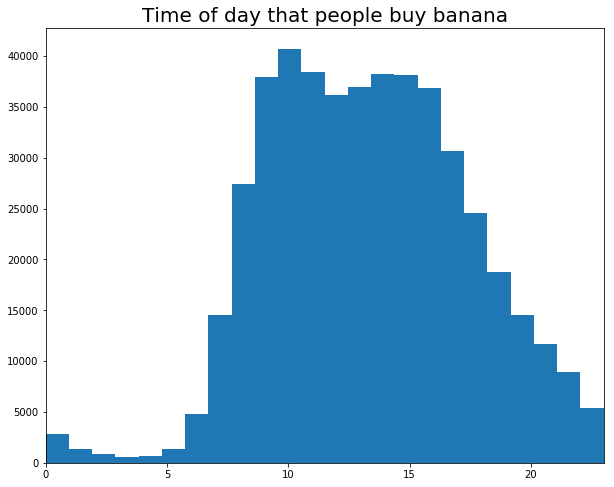

In [12]:
plt.rcParams["figure.figsize"] = [10,8]
plt.hist(df[df['product_id']==24852]['order_hour'].values,bins=24)
plt.xlim(0,23)
plt.title('Time of day that people buy banana',fontsize=20)

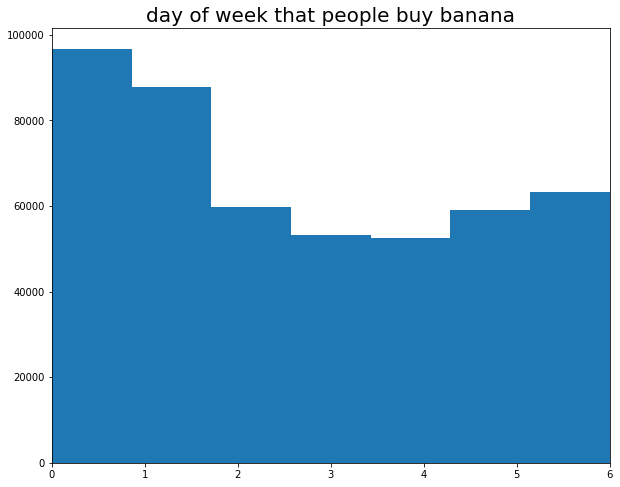

In [13]:
plt.rcParams["figure.figsize"] = [10,8]
plt.hist(df[df['product_id']==24852]['order_dow'].values,bins=7)
plt.xlim(0,6)
plt.title('day of week that people buy banana',fontsize=20)

In [13]:
x = np.array(range(24))
y = np.array(range(7))
X,Y = np.meshgrid(x, y)

In [14]:
aa=list()
for i in y:
    #print(i)
    bDf = df[df['product_id']==24852]
    bDf = bDf[bDf['order_dow'] == i]
    bb=list()
    for j in x:
        #Z(i,j) = bDf[bDf['order_dow']==j].size/7
        bb.append(bDf[bDf['order_hour']==j].size/7)
    aa.append(bb)

In [15]:
Z = np.array(aa)

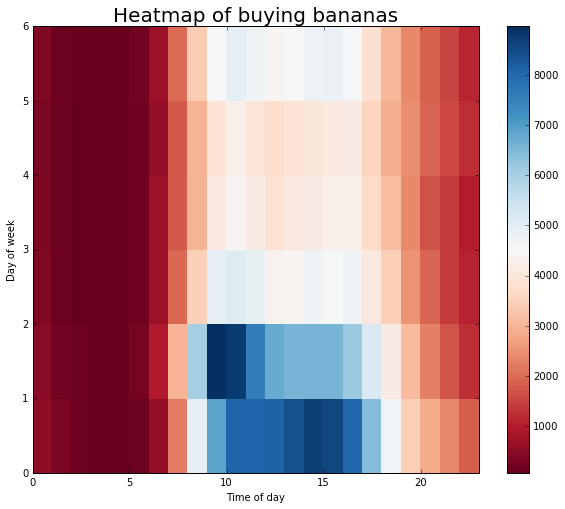

In [16]:
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = [12,10]
p = ax.pcolor(X, Y, Z, cmap=plt.cm.RdBu, vmin=abs(Z).min(), vmax=abs(Z).max())
cb = fig.colorbar(p, ax=ax)
plt.xlabel('Time of day')
plt.xlim(0,23)
plt.ylabel('Day of week')
plt.title('Heatmap of buying bananas',fontsize=20)

## we conclude that weekends are more popular than middle of the week, and the rush hours are between 9-17

# Now we will design our first classifier

In [17]:
from sklearn.cross_validation import train_test_split

In [18]:
X_train,X_test,Y_train,Y_test = train_test_split(df.drop('future_buy',axis=1),df['future_buy'],test_size=0.3,random_state=101)

In [19]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [20]:
pred = logreg.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(Y_test, pred))

             precision    recall  f1-score   support

          0       0.73      1.00      0.84   7089682
          1       0.00      0.00      0.00   2640665

avg / total       0.53      0.73      0.61   9730347



/usr/local/src/conda3_runtime.v13/4.1.1/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, pred)

array([[7089682,       0],
       [2640665,       0]])

### The classifier is "stupid" - it always predict 0 (which is not that bad consider that it's the right decision in ~73% of the cases), but we will try to achieve better results in our project